# Práctica 5
## Elementos de estadística descriptiva

---

In [8]:
library('ggplot2')
library('tidyr')
library('MASS')

In [9]:
options(repr.plot.width=3.5, repr.plot.height=3.5)
options(digits=2)

## 1. Considérese el experimento de lanzar $20$ veces una moneda y obtener la secuencia: 
$$
H,T,H,H,T,H,H,T,H,H,T,T,H,T,T,T,H,H,H,T
$$

In [12]:
sec_obtenida <- c("H","T","H","H","T","H","H","T","H","H","T","T","H","T","T","T","H","H","H","T")
tb_sec_obtenida <- table(sec_obtenida)

### Proporciones

In [14]:
proporciones <- prop.table(tb_sec_obtenida)
proporciones

sec_obtenida
   H    T 
0.55 0.45 

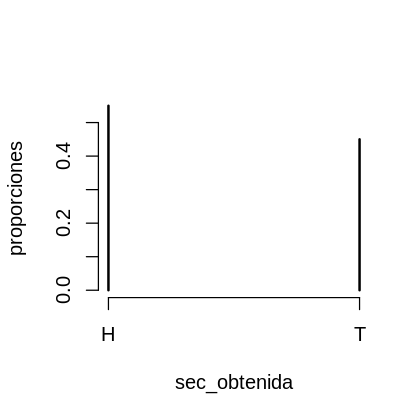

In [15]:
p1 <- plot(proporciones)

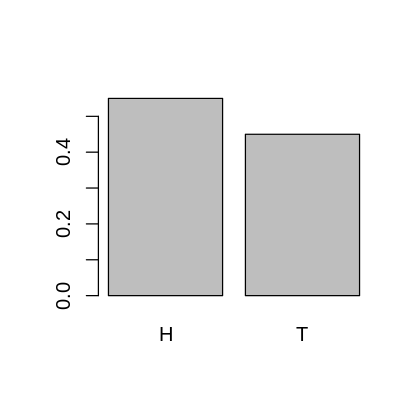

In [16]:
p2 <- barplot(proporciones)

## 2. Para el dataset analizado anteriormente y que se creó: log_mammals realizar:
* a)Para datos cuantitativos es común realizar diagramas de tallos y hojas. Investigar la interpretación de estos diagramas y usar la función stem del paquete base de R para realizar tales diagramas a las variables log_body y log_brain e interpretarlas.
* b) scatterplot coloreando diferente a cada grupo que se creó: mamífero pequeño y mamífero grande con la variable size_body.
* c) Instalar el paquete dplyr para colocar los datos en un formato long y se pueda graficar con el paquete de ggplot2 con la función gather el dataframe log_mammals. Después de instalar tal paquete, realizar mismo enunciado que a) pero con geom_points y paquete ggplot2.
* d) Calcular estadísticas como el promedio, mediana, máximo y mínimo por grupos de mamífero pequeño y mamífero grande con dplyr y funciones como group_by, sumarise y el operador %>% (pipe). Ver como ayuda: Data Wrangling with dplyr and tidyr o Data Transformation with dplyr o bien como ejemplo de uso: https://genomicsclass.github.io/book/pages/dplyr_tutorial.html u otro tutorial en la red de dplyr ¿qué mamíferos en cada grupo están en los tres primeros lugares (pensando que se ordenan de forma decreciente en log_brain)?.
* e) Crea una nueva variable r que sea el cociente entre brain y body. Ordena en orden creciente el dataset de mammals de acuerdo a esta nueva variable. ¿Qué mamíferos tienen los cocientes más grandes? ¿y cuáles los más pequeños?
* f) Usando e) realiza un scatterplot de r vs body.

In [20]:
log_mammals<-log(mammals)
colnames(log_mammals) <- c('log_body', 'log_brain')
head(log_mammals)

,log_body,log_brain
,<dbl>,<dbl>
Arctic fox,1.22,3.8
Owl monkey,-0.73,2.7
Mountain beaver,0.30,2.1
Cow,6.14,6.0
Grey wolf,3.59,4.8
Goat,3.32,4.7


In [21]:
stem(log_mammals$log_body)


  The decimal point is at the |

  -4 | 36
  -2 | 880863311
  -0 | 639763211
   0 | 00333557912233344459
   2 | 347366
   4 | 00114612335
   6 | 1338
   8 | 8



In [22]:
stem(log_mammals$log_brain)


  The decimal point is at the |

  -2 | 0
  -0 | 4219
   0 | 00269901344677899
   2 | 1445555789022789
   4 | 01467781122228
   6 | 00012552
   8 | 47



In [33]:
#crear una nueva variable categórica que distinga entre mamíferos grande y pequeños
medianas <- c(median(log_mammals$log_body), median(log_mammals$log_brain))
log_mammals$body_size <- ifelse(log_mammals$log_body < medianas[1], "pequeño", "grande" )
log_mammals$brain_size <- ifelse(log_mammals$log_brain < medianas[2], "pequeño", "grande" )

In [34]:
head(log_mammals)

,log_body,log_brain,body_size,brain_size
,<dbl>,<dbl>,<chr>,<chr>
Arctic fox,1.22,3.8,grande,grande
Owl monkey,-0.73,2.7,pequeño,pequeño
Mountain beaver,0.30,2.1,pequeño,pequeño
Cow,6.14,6.0,grande,grande
Grey wolf,3.59,4.8,grande,grande
Goat,3.32,4.7,grande,grande


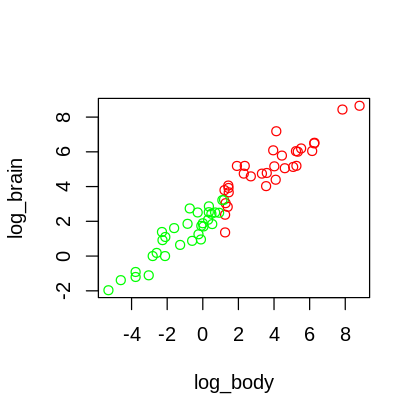

In [40]:
log_mammals$color <- ifelse(log_mammals$body_size == "grande", "red", "green")
plot(log_mammals$log_body,log_mammals$log_brain,xlab="log_body",ylab="log_brain",col=log_mammals$color)

In [45]:
long<-gather(log_mammals,"var","col",c(log_body,log_brain))
head(long)

body_size,brain_size,color,var,col
<chr>,<chr>,<chr>,<chr>,<dbl>
grande,grande,red,log_body,1.22
pequeño,pequeño,green,log_body,-0.73
pequeño,pequeño,green,log_body,0.30
grande,grande,red,log_body,6.14
grande,grande,red,log_body,3.59
grande,grande,red,log_body,3.32


In [55]:
p3 <- ggplot(data=long, aes(x=var,y=col, color=body_size))

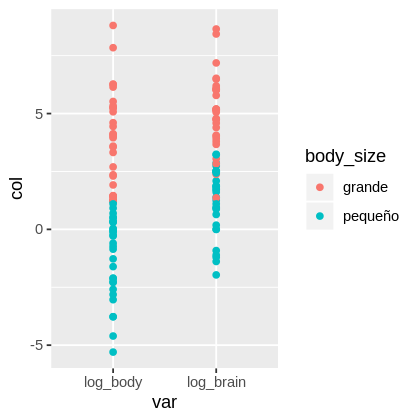

In [56]:
p3 + geom_point()

In [58]:
group_by(log_mammals,log_mammals$body_size) %>%
  summarize(n(),mean(log_mammals$log_body),median(log_mammals$log_body),min(log_mammals$log_body),max(log_mammals$log_body))


log_mammals$body_size,n(),mean(log_mammals$log_body),median(log_mammals$log_body),min(log_mammals$log_body),max(log_mammals$log_body)
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
grande,31,1.3,1.2,-5.3,8.8
pequeño,31,1.3,1.2,-5.3,8.8


In [68]:
log_mammals$r <- log_mammals$log_brain / log_mammals$log_body
tb_desc <- mammals[c(order(log_mammals$r)), ]
tb_asc <- mammals[c(order(-log_mammals$r)), ]
head(tb_desc)
head(tb_asc)

,body,brain
,<dbl>,<dbl>
Arctic ground squirrel,0.92,5.7
Tenrec,0.90,2.6
Rock hyrax-a,0.75,12.3
European hedgehog,0.79,3.5
Owl monkey,0.48,15.5
Chinchilla,0.42,6.4


,body,brain
,<dbl>,<dbl>
African giant pouched rat,1.0,6.6
Guinea pig,1.0,5.5
Genet,1.4,17.5
Slow loris,1.4,12.5
Mountain beaver,1.4,8.1
Phalanger,1.6,11.4


In [72]:
p<-ggplot(data=log_mammals, aes(x=log_body,y=r, color=body_size))

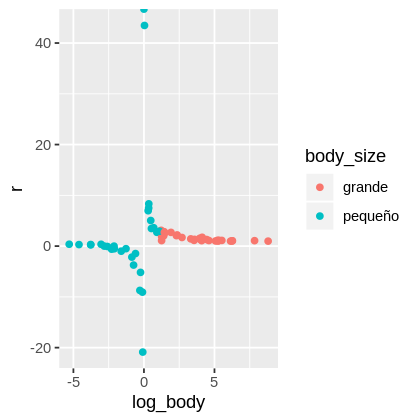

In [73]:
p + geom_point()

## 3. Considérese el dataset randu (ejecutar ?randu para una descripción):
a) Usar la función mean para calcular la media muestral en cada uno de los números que forman la tripleta: $x, y, z$. Asimismo usar la función var para calcular una matriz de varianzas y covarianzas muestral.

b) Queremos ver la distribución del promedio por renglón de cada observación del dataset randu, para esto utilizar la función de apply para calcular tal promedio, alternativamente usar rowMeans.

c) Utilizar la función hist del paquete base para calcular un histograma con los breaks definido por tal función.

d) Calcular sus propios breaks y volver a graficar el histograma con hist y con geom_histogram del paquete ggplot2.

e) Utilizar la función qqnorm para comparar los cuantiles de una distribución normal con la distribución de las medias muestrales obtenidos en el inciso b). Sólo de forma visual ¿qué se puede concluir sobre la distribución de las medias muestrales calculadas en b)? (puedes añadir una línea al gráfico con qqline).

In [74]:
df <- randu
head(df)

x,y,z
<dbl>,<dbl>,<dbl>
3.1e-05,0.00018,0.00082
4.4e-02,0.15573,0.53394
8.2e-01,0.87342,0.83854
3.2e-01,0.64855,0.99065
3.9e-01,0.82687,0.41888
3.1e-01,0.92659,0.77766


In [77]:
summary(df)

       x              y              z       
 Min.   :0.00   Min.   :0.00   Min.   :0.00  
 1st Qu.:0.30   1st Qu.:0.23   1st Qu.:0.25  
 Median :0.54   Median :0.48   Median :0.46  
 Mean   :0.53   Mean   :0.49   Mean   :0.48  
 3rd Qu.:0.78   3rd Qu.:0.74   3rd Qu.:0.71  
 Max.   :1.00   Max.   :1.00   Max.   :1.00  

In [78]:
mean(df$x)

[1] 0.53

In [79]:
mean(df$y)

[1] 0.49

In [80]:
mean(df$z)

[1] 0.48

In [81]:
var(df$x)

[1] 0.081

In [82]:
mean(df$y)

[1] 0.49

In [84]:
mean(df$z)

[1] 0.48

In [85]:
var(df)

,x,y,z
x,0.0812,-0.0041,0.0046
y,-0.0041,0.0863,-0.0051
z,0.0046,-0.0051,0.0779


In [86]:
dist_prom <- apply(df, MARGIN=1, FUN=mean)
head(dist_prom)

1       2       3       4       5       6 
0.00035 0.24472 0.84480 0.65383 0.54645 0.67112

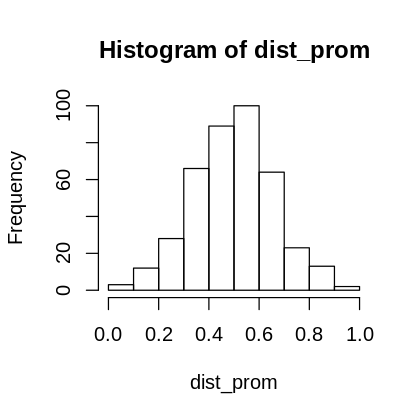

In [87]:
hist(dist_prom)

In [89]:
dif <- 0.06
width <- .1
cortes_mean <- seq(min(dist_prom) - dif, max(dist_prom) + dif, by = width)

## 4. Realizar gráficas con el comando qqplot para comparar $2$ distribuciones de datos, por ejemplo

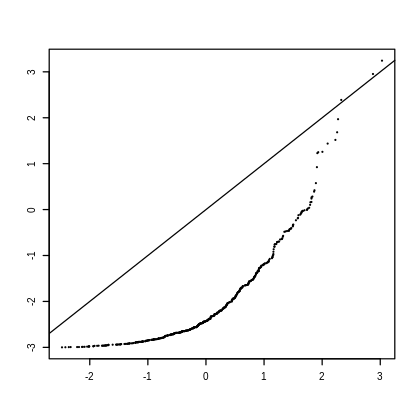

In [90]:
n<-500
set.seed(2000)
par(cex=0.5) #control size of labels
datos<- qqplot(rnorm(n), rexp(n)-3, cex=.1, xlab='', ylab='')
abline(0,1) #recta a 45 grados, sirve de apoyo para realizar comentarios

Normal contra Exponencial en cero


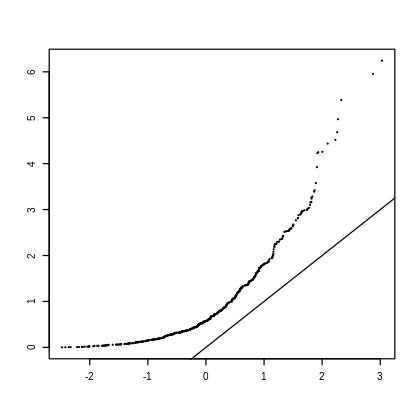

In [91]:

n<-500
set.seed(2000)
par(cex=0.5) #control size of labels
datos<- qqplot(rnorm(n), rexp(n), cex=.1, xlab='', ylab='')
abline(0,1) #recta a 45 grados, sirve de apoyo para realizar comentarios

Normal contra Exponencial desplazada una unidad


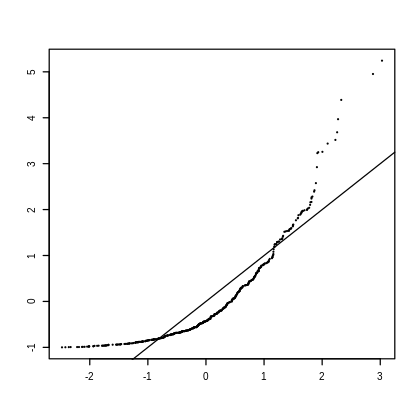

In [92]:

n<-500
set.seed(2000)
par(cex=0.5) #control size of labels
datos<- qqplot(rnorm(n), rexp(n)-1, cex=.1, xlab='', ylab='')
abline(0,1) #recta a 45 grados, sirve de apoyo para realizar comentarios

Normal contra uniforme


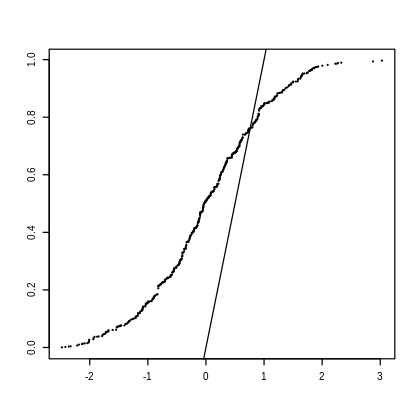

In [93]:
n<-500
set.seed(2000)
par(cex=0.5) #control size of labels
datos<- qqplot(rnorm(n), runif(n), cex=.1, xlab='', ylab='')
abline(0,1) #recta a 45 grados, sirve de apoyo para realizar comentarios

Normal contra uniforme desplazada de la forma $2.5 \times runif(n) - 1.2$

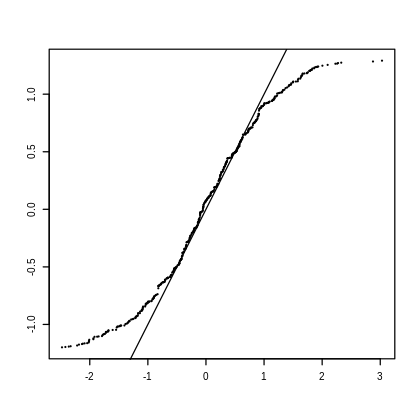

In [94]:
n<-500
set.seed(2000)
par(cex=0.5) #control size of labels
datos<- qqplot(rnorm(n), 2.5*runif(n)-1.2, cex=.1, xlab='', ylab='')
abline(0,1) #recta a 45 grados, sirve de apoyo para realizar comentarios

Normal contra Beta desplazada una unidad


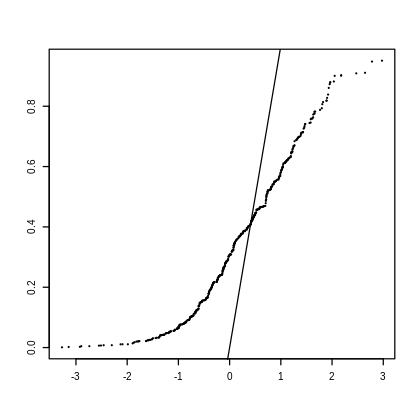

In [95]:

n<-500
set.seed(2000)
vec<-rbeta(n, shape1=.5,shape2=.5)
vec_eval<-dbeta(vec,shape1=.5,shape2=.5)
par(cex=0.5) #control size of labels
datos<- qqplot(rnorm(n), rbeta(n, shape1=1,shape2=2), cex=.1, xlab='', ylab='')
abline(0,1) #recta a 45 grados, sirve de apoyo para realizar comentarios